<a href="https://colab.research.google.com/github/FrankDagbe/Machine_Learning_Projects/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: Predicting Wine Quality with Machine Learning

##Introduction:

Welcome to my machine learning project where I explored the fascinating world of wine quality prediction! In this project, I leveraged the power of various machine learning models to predict the quality of wine based on essential features that influence its taste and appeal.

##Dataset:

The dataset was sourced from Kaggle, a renowned platform for data science enthusiasts. The dataset, titled "Wine Quality," comprises a collection of fundamental attributes that play a pivotal role in determining wine quality. You can find the dataset [here](https://www.kaggle.com/datasets/rajyellow46/wine-quality)



##Objective:

The primary goal is to develop machine learning models that can accurately predict the quality of wine. To achieve this, I went through data preprocessing procedures, exploratory data analysis, and applied a variety of machine learning algorithms.



#Data Preparation

In [79]:
#Uploading local files
from google.colab import files
uploaded = files.upload()

Saving winequalityN.csv to winequalityN (1).csv


In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [16]:
data = pd.read_csv('winequalityN.csv')


In [17]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [18]:
#Display summary statistics of numerical columns
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [19]:
# Display the first few rows of the dataset
data.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [20]:
# Display the last few rows of the datset
data.tail(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6487  red            6.6             0.725         0.20             7.8   
6488  red            6.3             0.550         0.15             1.8   
6489  red            5.4             0.740         0.09             1.7   
6490  red            6.3             0.510         0.13             2.3   
6491  red            6.8             0.620         0.08             1.9   
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6487      0.073                 29.0                  79.0  0.99770  3.29   
6488      0.077                 26.0                  35.0  0.99314  3.32   
6489      0.089                 16.0                  26.0  0.99402  3.67   
6490      0.076                 29.0                  40.0  0.99574  3.42   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6487       0.54      9.2        5  
6488       0.82     11.6        6  
6489       0.56     11.6        6  
6490       0.75     11.0        6  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [21]:
# Handling missing values
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [22]:
#Takign care of missing values
# Since there are more than 6,000 rows, it does not hurt to drop a few missing values
data = data.dropna()

In [23]:
#Checking for missing values
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Data visulaization

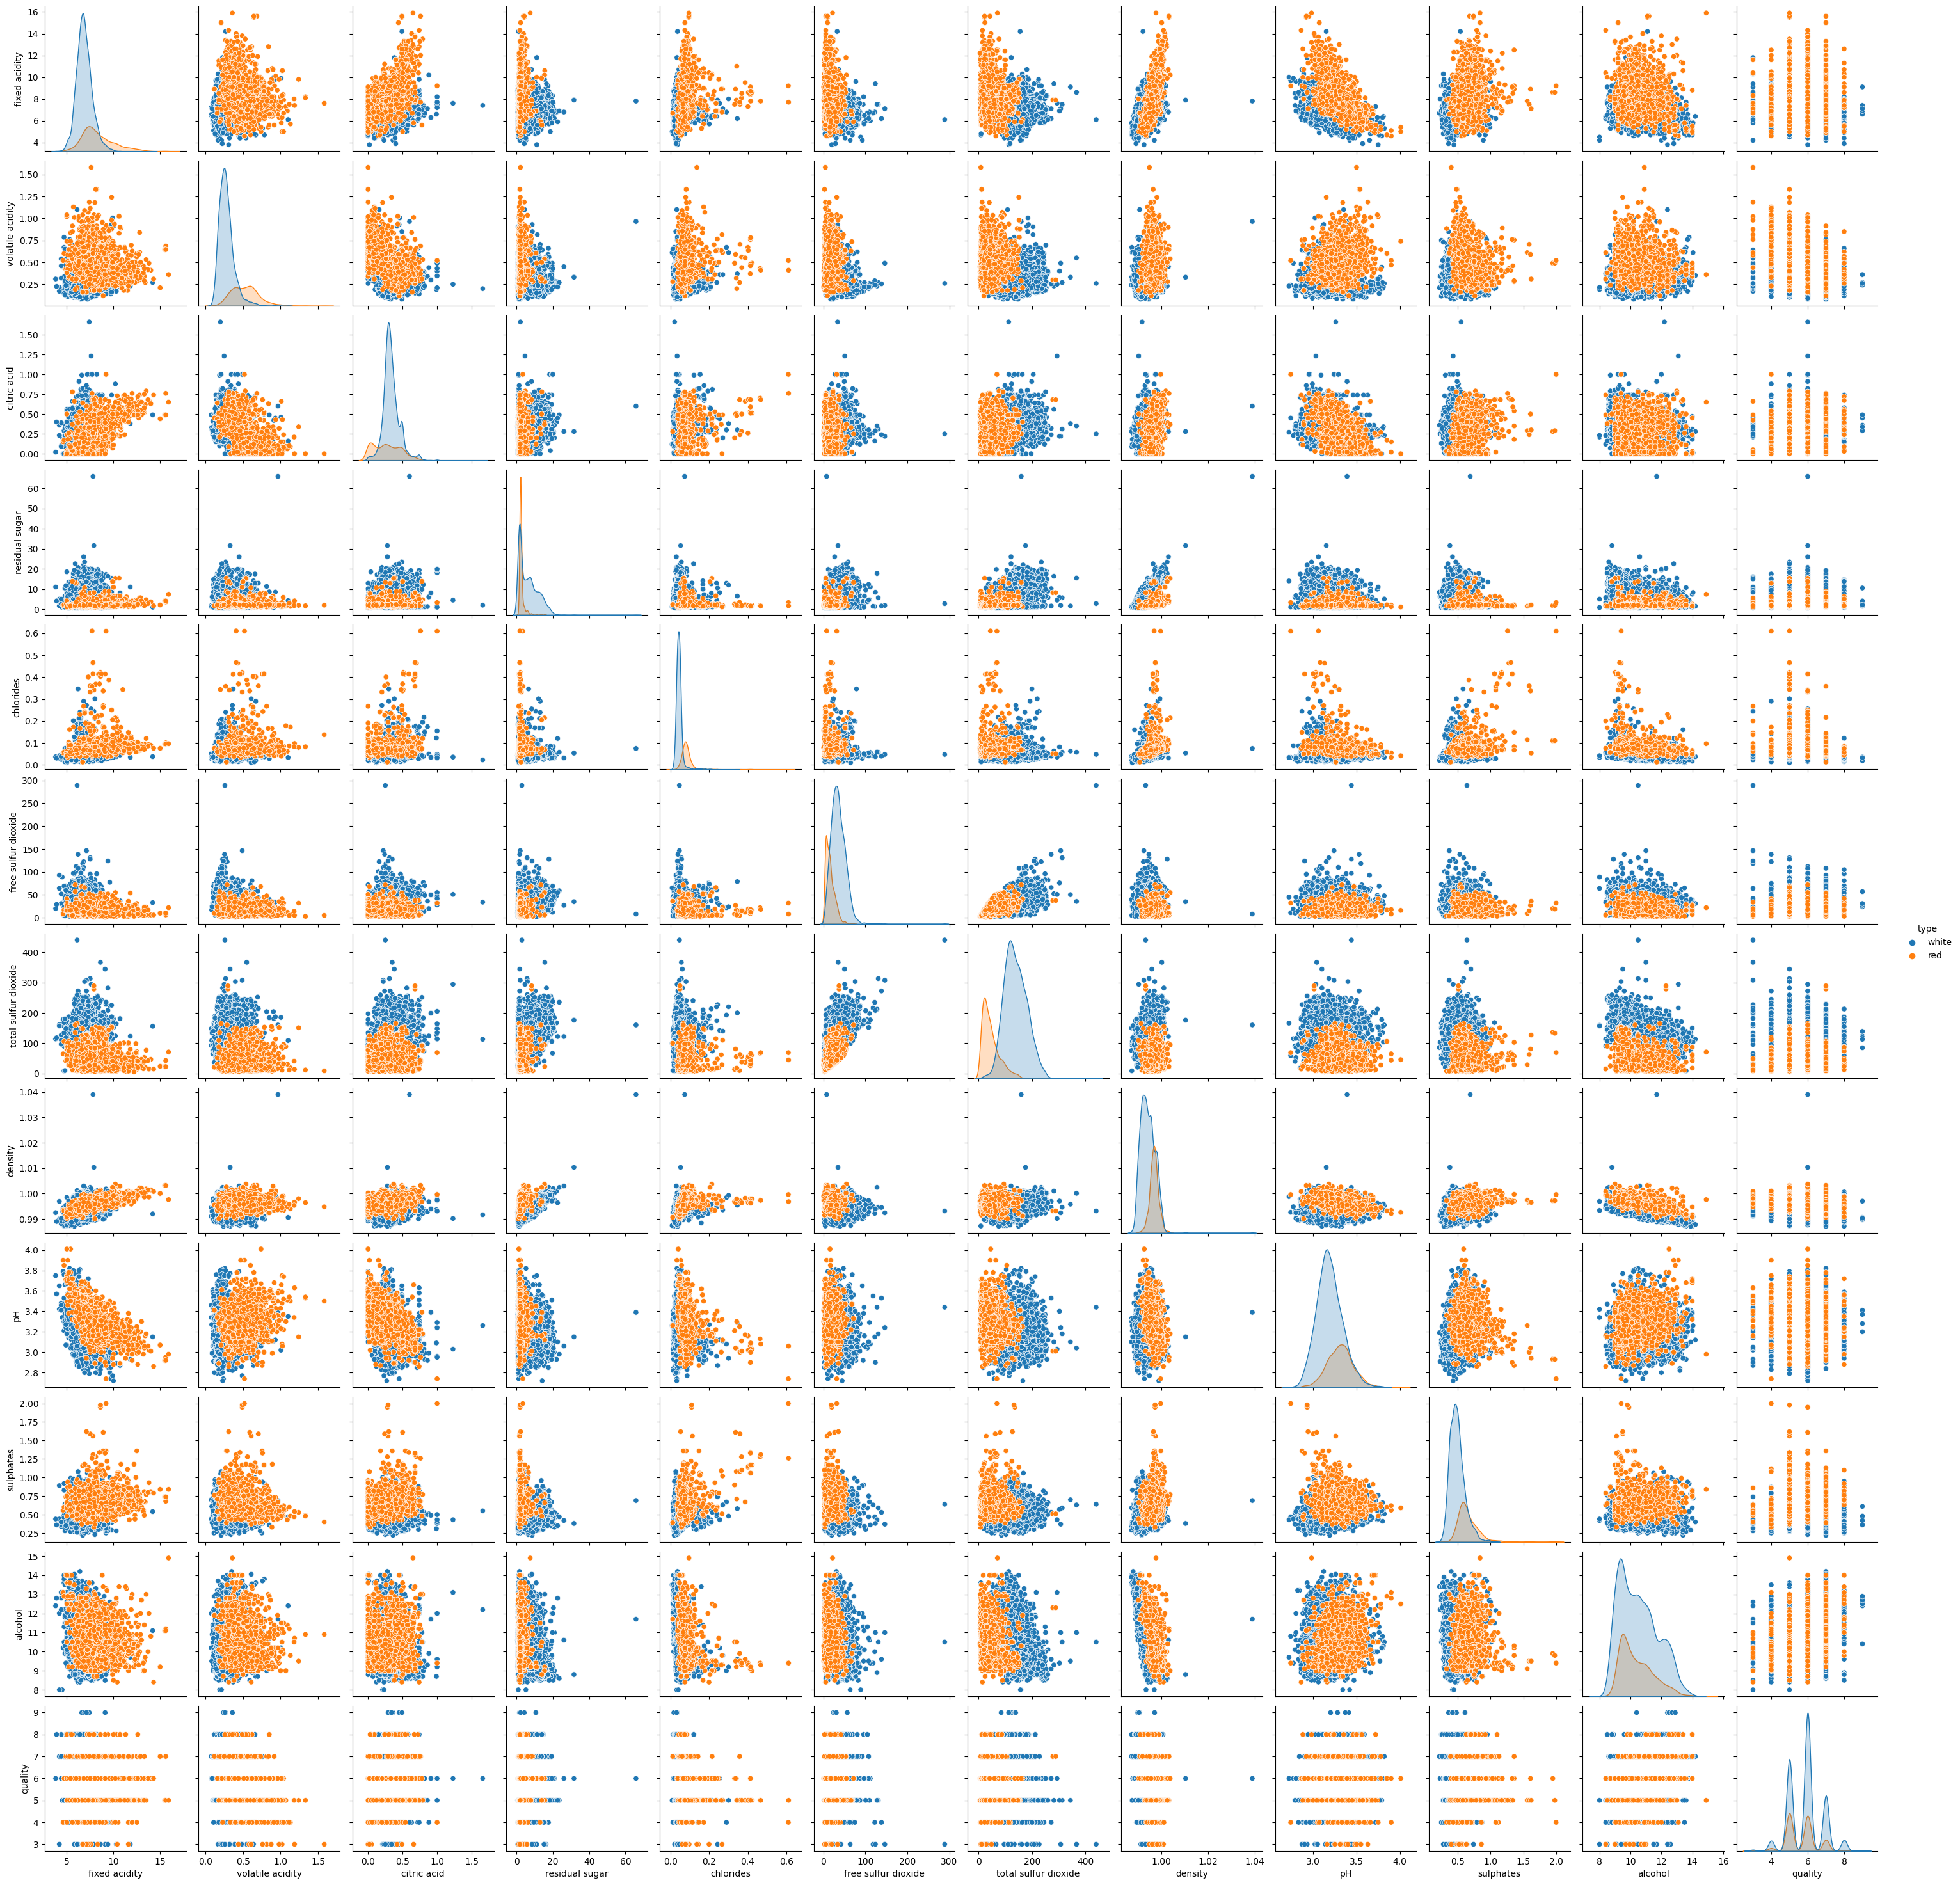

In [ ]:
sns.pairplot(data, hue='type')
plt.show()

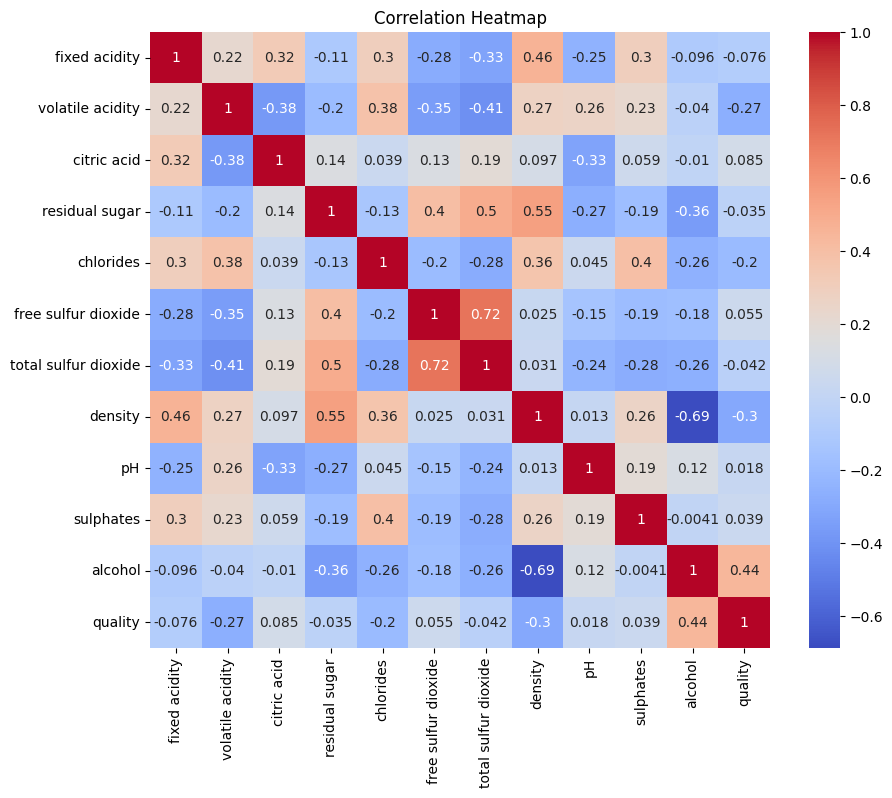

In [ ]:
# Checking for correlations
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

#Feature Engineering

In [148]:
# There seems to be a strong positive correlation between total sulfur dioxide and free sulfur dioxide. As a result, one of them is dropped
del data['free sulfur dioxide']
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  total sulfur dioxide  density    pH  sulphates  alcohol  quality  
0      0.045                 170.0   1.0010  3.00       0.45      8.8        6  
1      0.049                 132.0   0.9940  3.30       0.49      9.5        6  
2      0.050                  97.0   0.9951  3.26       0.44     10.1        6  
3      0.058                 186.0   0.9956  3.19       0.40      9.9        6  
4      0.058                 186.0   0.9956  3.19       0.40      9.9        6

In [24]:
# One-hot encode categorical values
encoded_data= pd.get_dummies(data, columns= ['type'],drop_first=True )
encoded_data.head()
encoded_data.tail()
encoded_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

#Model Selection and Evaluation

In [25]:
# shuffling the data before split
from sklearn.utils import shuffle
shuffled_data= shuffle(encoded_data, random_state=42,)
shuffled_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1143            7.2              0.24         0.30             1.6      0.048   
2708            6.8              0.23         0.42             7.4      0.044   
4943            4.6              0.52         0.15             2.1      0.054   
4194            6.7              0.20         0.24             6.5      0.044   
5956            9.9              0.53         0.57             2.4      0.093   
...             ...               ...          ...             ...        ...   
3798            7.9              0.21         0.39             2.0      0.057   
5219            9.3              0.61         0.26             3.4      0.090   
5254           11.5              0.41         0.52             3.0      0.080   
5418            9.8              0.25         0.49             2.7      0.088   
881             8.8              0.36         0.44             1.9      0.040   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1143                 27.0                 131.0  0.99330  3.25       0.45   
2708                 56.0                 189.0  0.99580  3.22       0.48   
4943                  8.0                  65.0  0.99340  3.90       0.56   
4194                 28.0                 100.0  0.99348  3.12       0.33   
5956                 30.0                  52.0  0.99710  3.19       0.76   
...                   ...                   ...      ...   ...        ...   
3798                 21.0                 138.0  0.99176  3.05       0.52   
5219                 25.0                  87.0  0.99975  3.24       0.62   
5254                 29.0                  55.0  1.00010  3.26       0.88   
5418                 15.0                  33.0  0.99820  3.42       0.90   
881                   9.0                 121.0  0.99530  3.19       0.48   

      alcohol  quality  type_white  
1143     10.5        5           1  
2708      9.3        6           1  
4943     13.1        4           0  
4194     10.2        6           1  
5956     11.6        7           0  
...       ...      ...         ...  
3798     10.9        5           1  
5219      9.7        5           0  
5254     11.0        5           0  
5418     10.0        6           0  
881       9.9        6           1  

[6463 rows x 13 columns]

In [26]:
# Split into features (X) and target (Y)
X = shuffled_data.drop('quality', axis=1)
Y = shuffled_data['quality']

print(Y) # Multi-class classification


1143    5
2708    6
4943    4
4194    6
5956    7
       ..
3798    5
5219    5
5254    5
5418    6
881     6
Name: quality, Length: 6463, dtype: int64


In [27]:
# Normalising the target data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)


In [36]:
# Model selection
models_1= {
	'Logistic Regression': LogisticRegression(),
	'K Nearest Neighbors': KNeighborsClassifier(),
	'Decision Tree': DecisionTreeClassifier(),
	'Random Forest': RandomForestClassifier(),
	'Gradient Boosting': GradientBoostingClassifier(),
	'Support Vector Machine': SVC()
}



In [39]:
# Model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
results_1 = {}
for name, model in models_1.items():
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	accuracy = accuracy_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred, average='micro')  # Calculate F1-score
	results_1[name] = {'Accuracy': accuracy, 'F1-score': f1}  # Store both Accuracy and F1-score



In [30]:
# Print the results
for name, metrics in results.items():
	print(f'{name}: Accuracy = {metrics["Accuracy"]:.2f}, F1-score = {metrics["F1-score"]:.2f}')


Logistic Regression: Accuracy = 0.54, F1-score = 0.54
K Nearest Neighbors: Accuracy = 0.57, F1-score = 0.57
Decision Tree: Accuracy = 0.62, F1-score = 0.62
Random Forest: Accuracy = 0.70, F1-score = 0.70
Gradient Boosting: Accuracy = 0.59, F1-score = 0.59
Support Vector Machine: Accuracy = 0.58, F1-score = 0.58


In [25]:
#Hyperparameter Tuning (for models with tunable parameters)
# Define the hyperparameter grid for each model
model_parameters = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0],
        "solver": ["lbfgs", 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        "max_iter": [10, 50, 100, 150, 200, 260, 300, 500, 1000, 10000, 1000000]
    },
    "SVC": {
        "C": [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0],
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "gamma": ["scale", "auto"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "min_samples_split": [2, 3, 4, 5],
        "min_samples_leaf": [1, 2, 3]
    },
    "KNN": {
        "n_neighbors": [2, 3, 4, 5, 7, 10, 15]
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100, 150, 200, 250],
        "criterion": ["gini", "entropy", "log_loss"],
        "min_samples_split": [2, 3, 4, 5],
        "min_samples_leaf": [1, 2, 3],
        "max_features": ["sqrt", "log2"]
    },
    "Ada Boost": {
        "n_estimators": [10, 50, 100, 150, 200, 250],
        "learning_rate": [0.3, 0.5, 1.0, 1.5, 2.0, 3.5, 4.0]
    },
    "Gradient Boost": {
        "loss": ['deviance', 'exponential'],
        "learning_rate": [0.3, 0.5, 1.0, 1.5, 2.0, 3.0],
        "n_estimators": [10, 50, 100, 150, 200, 250],
        "min_samples_split": [2, 3, 4, 5],
        "min_samples_leaf": [1, 2, 3]
    }
}

In [26]:
# Initialize the models
random_seed = 42
models = {
	'Logistic Regression': LogisticRegression(),
	'K Nearest Neighbors': KNeighborsClassifier(),
	'Decision Tree': DecisionTreeClassifier(),
	'Random Forest': RandomForestClassifier(),
	'Gradient Boosting': GradientBoostingClassifier(),
	'Support Vector Machine': SVC()
}

In [27]:
# Perform hyperparameter tuning using GridSearchCV
best_models_grid = {}
for model_name, model in models.items():
    if model_name in model_parameters:
        grid_search = GridSearchCV(model, model_parameters[model_name], cv=10, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models_grid[model_name] = grid_search.best_estimator_
    else:
        best_models_grid[model_name] = model

# Print the best hyperparameters for each model (GridSearchCV)
for model_name, best_model in best_models_grid.items():
	print(f'Best hyperparameters (GridSearchCV) for {model_name}: {best_model.get_params()}')

Best hyperparameters (GridSearchCV) for Logistic Regression: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best hyperparameters (GridSearchCV) for K Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best hyperparameters (GridSearchCV) for Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best hyperparameters (GridSearchCV) for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'cr

In [28]:
# Create a dictionary to store the evaluation results
evaluation_results = {}

for model_name, best_model in best_models_grid.items():
    # Fit the best model on the training data (if not already fitted)
    best_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

    # Store the results in the dictionary
    evaluation_results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print the evaluation results
for model_name, results in evaluation_results.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {results["Accuracy"]:.4f}')
    print(f'F1 Score: {results["F1 Score"]:.4f}')
    print()




Model: Logistic Regression
Accuracy: 0.5429
F1 Score: 0.5177

Model: K Nearest Neighbors
Accuracy: 0.5654
F1 Score: 0.5551

Model: Decision Tree
Accuracy: 0.6241
F1 Score: 0.6239

Model: Random Forest
Accuracy: 0.6899
F1 Score: 0.6769

Model: Gradient Boosting
Accuracy: 0.5886
F1 Score: 0.5768

Model: Support Vector Machine
Accuracy: 0.5847
F1 Score: 0.5536



In [31]:
# It appears our models may have overfitted from the gridseacrh cv
# Creating a less complex Gridsearch
# Define a simplified hyperparameter grid
model_parameters_simplified = {
    "Logistic Regression": {
        "C": [0.5, 1.0, 2.0, 5.0],
        "solver": ["lbfgs", 'liblinear', 'saga'],
        "max_iter": [100, 200, 500],
    },
    "SVC": {
        "C": [0.5, 1.0, 2.0, 5.0],
        "kernel": ['linear', 'rbf'],
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 3],
    },
    "KNN": {
        "n_neighbors": [3, 5, 10],
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "criterion": ["gini", "entropy"],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2],
    },
    "Ada Boost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.3, 0.5, 1.0],
    },
    "Gradient Boost": {
        "learning_rate": [0.3, 0.5, 1.0],
        "n_estimators": [50, 100],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2],
    }
}



In [32]:
# Initialize the models
random_seed = 42
models = {
	'Logistic Regression': LogisticRegression(),
	'K Nearest Neighbors': KNeighborsClassifier(),
	'Decision Tree': DecisionTreeClassifier(),
	'Random Forest': RandomForestClassifier(),
	'Gradient Boosting': GradientBoostingClassifier(),
	'Support Vector Machine': SVC()
}

In [33]:
# Perform hyperparameter tuning using GridSearchCV
best_models_grid = {}
for model_name, model in models.items():
    if model_name in model_parameters_simplified:
        grid_search = GridSearchCV(model, model_parameters_simplified[model_name], cv=10, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models_grid[model_name] = grid_search.best_estimator_
    else:
        best_models_grid[model_name] = model

# Print the best hyperparameters for each model (GridSearchCV)
for model_name, best_model in best_models_grid.items():
	print(f'Best hyperparameters (GridSearchCV) for {model_name}: {best_model.get_params()}')

Best hyperparameters (GridSearchCV) for Logistic Regression: {'C': 5.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 200, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best hyperparameters (GridSearchCV) for K Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best hyperparameters (GridSearchCV) for Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best hyperparameters (GridSearchCV) for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 

In [34]:
# Create a dictionary to store the evaluation results
evaluation_results = {}

for model_name, best_model in best_models_grid.items():
    # Fit the best model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

    # Store the results in the dictionary
    evaluation_results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print the evaluation results
for model_name, results in evaluation_results.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {results["Accuracy"]:.4f}')
    print(f'F1 Score: {results["F1 Score"]:.4f}')
    print()

Model: Logistic Regression
Accuracy: 0.5398
F1 Score: 0.5159

Model: K Nearest Neighbors
Accuracy: 0.5654
F1 Score: 0.5551

Model: Decision Tree
Accuracy: 0.6195
F1 Score: 0.6193

Model: Random Forest
Accuracy: 0.6914
F1 Score: 0.6778

Model: Gradient Boosting
Accuracy: 0.5878
F1 Score: 0.5761

Model: Support Vector Machine
Accuracy: 0.5847
F1 Score: 0.5536



In [35]:
from sklearn.ensemble import StackingClassifier

# Define the base models with their hyperparameters (use the best parameters from GridSearchCV)
base_models = [
    ('Random Forest', RandomForestClassifier(
        n_estimators=100, criterion='entropy', max_features='sqrt')),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini')),
    ('Support Vector Machine', SVC(kernel='rbf', gamma='scale', C=1.0))
]

# Define the meta-model (you can choose any classifier for the second level)
meta_model = RandomForestClassifier()

# Create the StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models, final_estimator=meta_model)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
stacking_predictions = stacking_model.predict(X_test)

# Calculate and print the accuracy and F1 score of the ensemble
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
stacking_f1 = f1_score(y_test, stacking_predictions, average='weighted')

print(f'Ensemble (Stacking) Accuracy: {stacking_accuracy:.4f}')
print(f'Ensemble (Stacking) F1 Score: {stacking_f1:.4f}')




Ensemble (Stacking) Accuracy: 0.6945
Ensemble (Stacking) F1 Score: 0.6837


In [ ]:
import tensorflow as tf

In [ ]:
# Convert pandas dataframe to tensorflow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Check the input shapes
input_shape_x = X_train_tensor.shape[1]  # Number of features in input data
print("Input shape for X_train_tensor:", input_shape_x)



In [ ]:
# Check the unique classes in y_train
unique_classes = tf.unique(tf.reshape(y_train_tensor, [-1]))[0]

# Number of unique classes
num_classes = tf.size(unique_classes).numpy()

print("Number of unique classes:", num_classes)

Number of unique classes: 7


In [ ]:
# Now that we know the input shape and the number of classes, let's build a simple multi-class classification neural network

import tensorflow as tf

# One-hot encode the labels
y_train_encoded = tf.one_hot(y_train, depth=num_classes)
y_test_encoded = tf.one_hot(y_test, depth=num_classes)

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(13,), name='input_layer'),
    tf.keras.layers.Dense(2, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(2, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(2, activation='relu', name='hidden_layer_3'),
    tf.keras.layers.Dense(7, activation='softmax', name='output_layer')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

# Train the model using one-hot encoded labels
model.fit(
    X_train_tensor,
    y_train_encoded,  # Use one-hot encoded labels here
    epochs=50,
    batch_size=32,
    validation_data=(X_test_tensor, y_test_encoded),# Use one-hot encoded labels here
    verbose=0)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_encoded)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


41/41 [==============================] - 0s 2ms/step - loss: 0.7240 - accuracy: 0.4401
Test loss: 0.7240
Test accuracy: 0.4401


In [ ]:
# Define and compile the model with dropout regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(13,), name='input_layer'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer with a dropout rate ( 0.5)
    tf.keras.layers.Dense(2, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer with the same dropout rate
    tf.keras.layers.Dense(2, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer with the same dropout rate
    tf.keras.layers.Dense(2, activation='relu', name='hidden_layer_3'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer with the same dropout rate
    tf.keras.layers.Dense(7, activation='softmax', name='output_layer')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using one-hot encoded labels
model.fit(
    X_train_tensor,
    y_train_encoded,  # Use one-hot encoded labels here
    epochs=50,
    batch_size=32,
    validation_data=(X_test_tensor, y_test_encoded),  # Use one-hot encoded labels here
    verbose=0)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_encoded)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


41/41 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.4401
Test loss: 0.7245
Test accuracy: 0.4401


#Model Comparison

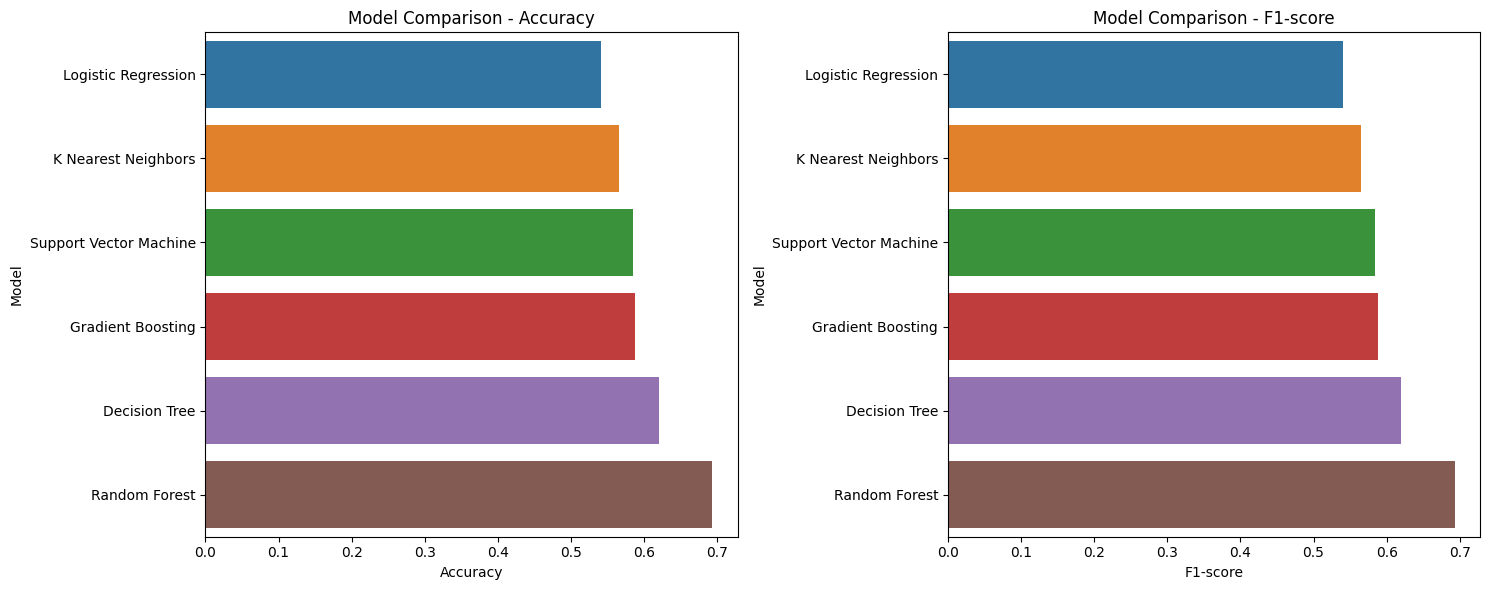

In [42]:
results_df = pd.DataFrame(results_1).transpose()
results_df.sort_values(by='F1-score', inplace=True)

# Create subplots for both Accuracy and F1-score
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for Accuracy
sns.barplot(data=results_df, x='Accuracy', y=results_df.index, ax=axes[0])
axes[0].set_title('Model Comparison - Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Model')

# Bar plot for F1-score
sns.barplot(data=results_df, x='F1-score', y=results_df.index, ax=axes[1])
axes[1].set_title('Model Comparison - F1-score')
axes[1].set_xlabel('F1-score')
axes[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

In [73]:
stacking_results = {
    'stacking_accuracy': 0.6945088940448569,
    'stacking_f1': 0.6837333052576607
}

deep_learning_results = {
    'deep_learning_accuracy': 0.4401,
}


evaluation_results['stacking_results'] = stacking_results
evaluation_results['deep_learning_results'] = deep_learning_results
print(evaluation_results)

{'Logistic Regression': {'Accuracy': 0.539829853054911, 'F1 Score': 0.5159419209862427}, 'K Nearest Neighbors': {'Accuracy': 0.5653518948182521, 'F1 Score': 0.5550963278892386}, 'Decision Tree': {'Accuracy': 0.6194895591647331, 'F1 Score': 0.6192735704022102}, 'Random Forest': {'Accuracy': 0.691415313225058, 'F1 Score': 0.6778091958619621}, 'Gradient Boosting': {'Accuracy': 0.5877803557617943, 'F1 Score': 0.5761082341137873}, 'Support Vector Machine': {'Accuracy': 0.5846867749419954, 'F1 Score': 0.5536386730156178}, 'stacking_results': {'stacking_accuracy': 0.6945088940448569, 'stacking_f1': 0.6837333052576607}, 'deep_learning_results': {'deep_learning_accuracy': 0.4401}}


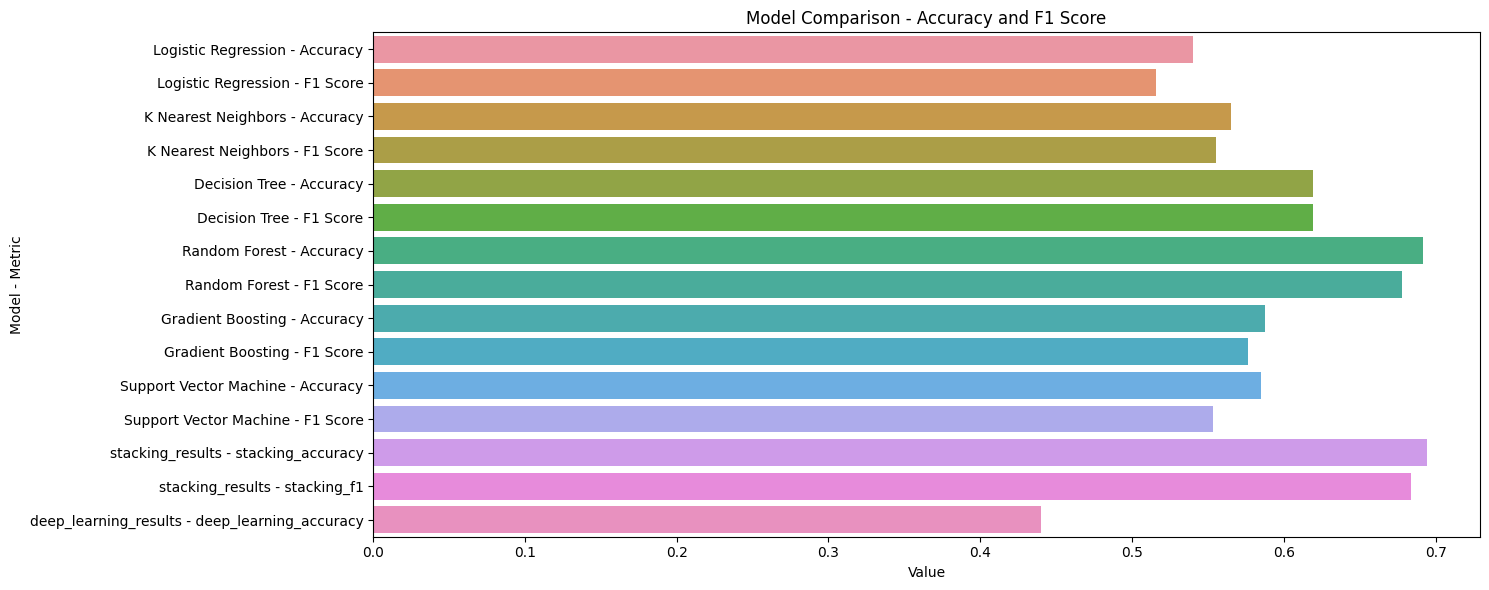

In [78]:
# Flatten the nested dictionaries
flattened_results = {}
for model, metrics in evaluation_results.items():
    if isinstance(metrics, dict):
        for metric, value in metrics.items():
            flattened_results[f'{model} - {metric}'] = value
    else:
        flattened_results[model] = metrics

# Create a DataFrame from the flattened_results dictionary
results_df = pd.DataFrame(flattened_results.values(), index=flattened_results.keys(), columns=['Value'])

# Create a figure with a subplot for Accuracy
fig, ax = plt.subplots(figsize=(15, 6))

# Bar plot for Accuracy
sns.barplot(data=results_df, x=results_df['Value'], y=results_df.index, ax=ax)
ax.set_title('Model Comparison - Accuracy and F1 Score')
ax.set_xlabel('Value')
ax.set_ylabel('Model - Metric')

plt.tight_layout()
plt.show()


#Conclusion
In the wine quality prediction project, it was found that the Random Forest model, even without parameter tuning, achieved an impressive accuracy of around 70 percent. Despite the efforts with hyperparameter tuning, ensemble methods (Stacking), and deep learning, this model consistently performed the best.

The key takeaway is the importance of domain-specific feature engineering. While machine learning models are powerful tools, fine-tuning features based on wine quality knowledge could further boost accuracy. This project underscores the critical role of domain expertise in refining predictive models.

In summary, the journey highlights the potential for improved wine quality prediction through domain-specific feature engineering, building on the foundation laid by machine learning techniques.